# Week 5: Hyperparameter tuning, learning rates, performance metrics, evaluation methods (dataset partitioning) #

# Hyperparameter tuning #

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 1) Create the dataset using the provided code
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# Extract the features we want to use: Labs vs Final
X = df_aug['Labs'].values.reshape(-1, 1)
y = df_aug['Final'].values

Train a linear regression with polynomial features to illustrate tuning of the learning rate in gradient descent, which is a sensitive hyperparameter.

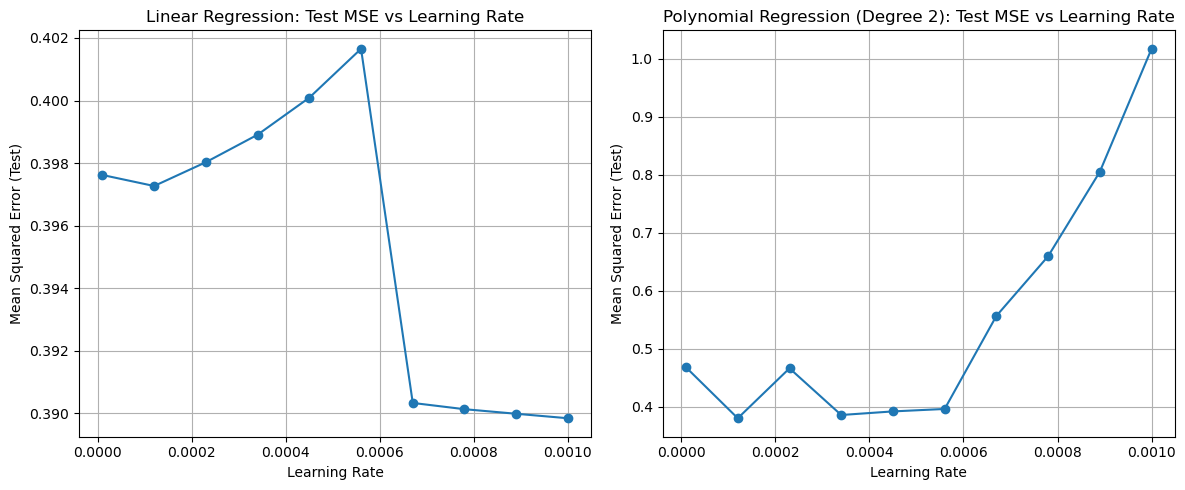

Learning Rates and corresponding Test MSE values:
------------------------------------------------
Learning Rate | Linear MSE | Polynomial MSE
0.000 | 0.3976 | 0.4676
0.000 | 0.3973 | 0.3799
0.000 | 0.3980 | 0.4660
0.000 | 0.3989 | 0.3855
0.000 | 0.4001 | 0.3917
0.001 | 0.4017 | 0.3960
0.001 | 0.3903 | 0.5563
0.001 | 0.3901 | 0.6592
0.001 | 0.3900 | 0.8049
0.001 | 0.3898 | 1.0168

Best learning rate for Linear Regression: 0.0010
Best learning rate for Polynomial Regression: 0.0001


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2 & 3 & 4) Test different learning rates and calculate MSE
# Create 10 values of learning rate between 0.001 and 1.5
learning_rates = np.linspace(0.00001, 0.001, 10)

# Linear model
linear_test_mse = []
poly_test_mse = []

for lr in learning_rates:
    # Linear regression
    linear_model = SGDRegressor(
        learning_rate='constant',
        eta0=lr,
        max_iter=2000,
        random_state=42
    )
    
    # Train the model
    linear_model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = linear_model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    linear_test_mse.append(mse)
    
    # Polynomial regression (degree 2)
    poly_model = SGDRegressor(
        learning_rate='constant',
        eta0=lr,
        max_iter=2000,
        random_state=42
    )
    
    # Train the model
    poly_model.fit(X_train_poly, y_train)
    
    # Predict on test set
    y_pred = poly_model.predict(X_test_poly)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    poly_test_mse.append(mse)

# Plot the results
plt.figure(figsize=(12, 5))

# Linear model
plt.subplot(1, 2, 1)
plt.plot(learning_rates, linear_test_mse, 'o-')
plt.title('Linear Regression: Test MSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (Test)')
plt.grid(True)

# Polynomial model
plt.subplot(1, 2, 2)
plt.plot(learning_rates, poly_test_mse, 'o-')
plt.title('Polynomial Regression (Degree 2): Test MSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (Test)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the results
print("Learning Rates and corresponding Test MSE values:")
print("------------------------------------------------")
print("Learning Rate | Linear MSE | Polynomial MSE")
for i, lr in enumerate(learning_rates):
    print(f"{lr:.3f} | {linear_test_mse[i]:.4f} | {poly_test_mse[i]:.4f}")

# Find the best learning rates
best_lr_linear = learning_rates[np.argmin(linear_test_mse)]
best_lr_poly = learning_rates[np.argmin(poly_test_mse)]

print(f"\nBest learning rate for Linear Regression: {best_lr_linear:.4f}")
print(f"Best learning rate for Polynomial Regression: {best_lr_poly:.4f}")

We now train also a second degree polynomial model (linear regression with polynomial features) to illustrate tuning of the regularization parameter lambda. Both the learning rate (see above) and the regularization parameter are hyperparameters. The way to tune them is to run the model for different values of the parameters and to pick the value which results in the smallest error of the test set. This is illustrated for the linear and for the second degree polynomial models.


Training and evaluating linear models with different regularization parameters:
------------------------------------------------------------
  Lambda = 0.000100: MSE = 0.3547
  Lambda = 0.000278: MSE = 0.3548
  Lambda = 0.000774: MSE = 0.3548
  Lambda = 0.002154: MSE = 0.3551
  Lambda = 0.005995: MSE = 0.3557
  Lambda = 0.016681: MSE = 0.3574
  Lambda = 0.046416: MSE = 0.3406
  Lambda = 0.129155: MSE = 0.3682
  Lambda = 0.359381: MSE = 0.3879
  Lambda = 1.000000: MSE = 0.4755

Training and evaluating polynomial models with different regularization parameters:
------------------------------------------------------------
  Lambda = 0.000100: MSE = 0.3466
  Lambda = 0.000278: MSE = 0.3466
  Lambda = 0.000774: MSE = 0.3466
  Lambda = 0.002154: MSE = 0.3467
  Lambda = 0.005995: MSE = 0.3470
  Lambda = 0.016681: MSE = 0.3478
  Lambda = 0.046416: MSE = 0.3260
  Lambda = 0.129155: MSE = 0.3296
  Lambda = 0.359381: MSE = 0.3426
  Lambda = 1.000000: MSE = 0.3864


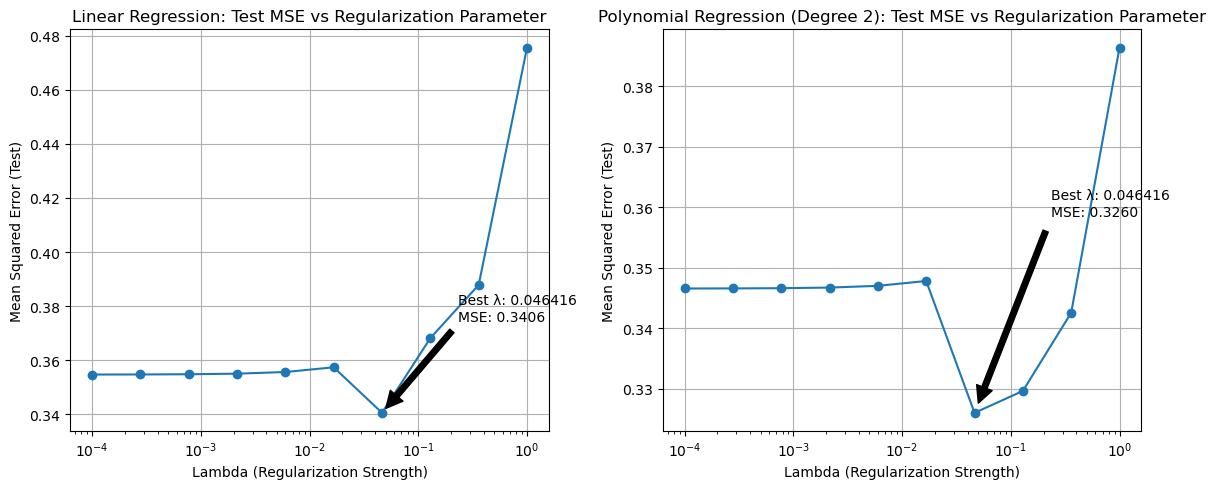


Regularization parameters and corresponding Test MSE values:
------------------------------------------------------------
Lambda        | Linear MSE     | Polynomial MSE
------------------------------------------------------------
0.000100    | 0.3547         | 0.3466
0.000278    | 0.3548         | 0.3466
0.000774    | 0.3548         | 0.3466
0.002154    | 0.3551         | 0.3467
0.005995    | 0.3557         | 0.3470
0.016681    | 0.3574         | 0.3478
0.046416    | 0.3406         | 0.3260
0.129155    | 0.3682         | 0.3296
0.359381    | 0.3879         | 0.3426
1.000000    | 0.4755         | 0.3864

Best Lambda for Linear Regression: 0.046416 (MSE: 0.3406)
Best Lambda for Polynomial Regression: 0.046416 (MSE: 0.3260)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 1) Create the dataset using the provided code
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# Extract the features we want to use: Labs vs Final
X = df_aug['Labs'].values.reshape(-1, 1)
y = df_aug['Final'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For polynomial features, scale after transformation
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# 2, 3 & 4) Test different regularization parameters and calculate MSE
# Create 10 values of Lambda (regularization parameter) between 0.0001 and 1.0 (log scale)
Lambdas = np.logspace(-4, 0, 10)  # 10 values between 0.0001 and 1.0 on log scale

# Use a fixed learning rate that we know works well
learning_rate = 0.01

# Initialize arrays to store results
linear_test_mse = []
poly_test_mse = []

print("\nTraining and evaluating linear models with different regularization parameters:")
print("-" * 60)

for Lambda in Lambdas:
    # Linear regression
    try:
        linear_model = SGDRegressor(
            alpha=Lambda,  # Regularization parameter (alpha in sklearn)
            learning_rate='constant',
            eta0=learning_rate,
            max_iter=1000,
            tol=1e-3,
            random_state=42,
            penalty='l2'  # L2 regularization (Ridge)
        )
        
        # Train the model on scaled data
        linear_model.fit(X_train_scaled, y_train)
        
        # Predict on scaled test set
        y_pred = linear_model.predict(X_test_scaled)
        
        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        
        print(f"  Lambda = {Lambda:.6f}: MSE = {mse:.4f}")
        linear_test_mse.append(mse)
            
    except Exception as e:
        print(f"  Error with Lambda {Lambda:.6f}: {e}")
        linear_test_mse.append(None)

print("\nTraining and evaluating polynomial models with different regularization parameters:")
print("-" * 60)

for Lambda in Lambdas:
    # Polynomial regression
    try:
        poly_model = SGDRegressor(
            alpha=Lambda,  # Regularization parameter (alpha in sklearn)
            learning_rate='constant',
            eta0=learning_rate,
            max_iter=1000,
            tol=1e-3,
            random_state=42,
            penalty='l2'  # L2 regularization (Ridge)
        )
        
        # Train the model on scaled data
        poly_model.fit(X_train_poly_scaled, y_train)
        
        # Predict on scaled test set
        y_pred = poly_model.predict(X_test_poly_scaled)
        
        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        
        print(f"  Lambda = {Lambda:.6f}: MSE = {mse:.4f}")
        poly_test_mse.append(mse)
            
    except Exception as e:
        print(f"  Error with Lambda {Lambda:.6f}: {e}")
        poly_test_mse.append(None)

# Filter out None values for plotting
valid_linear_data = [(L, mse) for L, mse in zip(Lambdas, linear_test_mse) if mse is not None]
valid_poly_data = [(L, mse) for L, mse in zip(Lambdas, poly_test_mse) if mse is not None]

# Plot the results
plt.figure(figsize=(12, 5))

# Linear model
plt.subplot(1, 2, 1)
if valid_linear_data:
    valid_Lambdas, valid_mses = zip(*valid_linear_data)
    plt.plot(valid_Lambdas, valid_mses, 'o-')
    plt.xscale('log')  # Log scale for Lambda values
    plt.title('Linear Regression: Test MSE vs Regularization Parameter')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel('Mean Squared Error (Test)')
    plt.grid(True)
    
    # Annotate the best Lambda
    min_idx = np.argmin(valid_mses)
    plt.annotate(f'Best λ: {valid_Lambdas[min_idx]:.6f}\nMSE: {valid_mses[min_idx]:.4f}',
                xy=(valid_Lambdas[min_idx], valid_mses[min_idx]),
                xytext=(valid_Lambdas[min_idx]*5, valid_mses[min_idx]*1.1),
                arrowprops=dict(facecolor='black', shrink=0.05))
else:
    plt.text(0.5, 0.5, 'No valid results', ha='center', va='center')

# Polynomial model
plt.subplot(1, 2, 2)
if valid_poly_data:
    valid_Lambdas, valid_mses = zip(*valid_poly_data)
    plt.plot(valid_Lambdas, valid_mses, 'o-')
    plt.xscale('log')  # Log scale for Lambda values
    plt.title('Polynomial Regression (Degree 2): Test MSE vs Regularization Parameter')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel('Mean Squared Error (Test)')
    plt.grid(True)
    
    #  best Lambda
    min_idx = np.argmin(valid_mses)
    plt.annotate(f'Best λ: {valid_Lambdas[min_idx]:.6f}\nMSE: {valid_mses[min_idx]:.4f}',
                xy=(valid_Lambdas[min_idx], valid_mses[min_idx]),
                xytext=(valid_Lambdas[min_idx]*5, valid_mses[min_idx]*1.1),
                arrowprops=dict(facecolor='black', shrink=0.05))
else:
    plt.text(0.5, 0.5, 'No valid results', ha='center', va='center')

plt.tight_layout()
plt.show()

# results table
print("\nRegularization parameters and corresponding Test MSE values:")
print("-" * 60)
print("Lambda        | Linear MSE     | Polynomial MSE")
print("-" * 60)
for i, Lambda in enumerate(Lambdas):
    linear_mse = "Invalid" if linear_test_mse[i] is None else f"{linear_test_mse[i]:.4f}"
    poly_mse = "Invalid" if poly_test_mse[i] is None else f"{poly_test_mse[i]:.4f}"
    print(f"{Lambda:.6f}    | {linear_mse.ljust(14)} | {poly_mse}")

# Find the best Lambdas from valid data
if valid_linear_data:
    best_Lambda_linear = valid_linear_data[np.argmin([mse for _, mse in valid_linear_data])][0]
    best_mse_linear = min([mse for _, mse in valid_linear_data])
    print(f"\nBest Lambda for Linear Regression: {best_Lambda_linear:.6f} (MSE: {best_mse_linear:.4f})")
else:
    print("\nNo valid results for Linear Regression")
    
if valid_poly_data:
    best_Lambda_poly = valid_poly_data[np.argmin([mse for _, mse in valid_poly_data])][0]
    best_mse_poly = min([mse for _, mse in valid_poly_data])
    print(f"Best Lambda for Polynomial Regression: {best_Lambda_poly:.6f} (MSE: {best_mse_poly:.4f})")
else:
    print("No valid results for Polynomial Regression")

We now train the models (linear and polynomial degree 2) with the best reg. parameter (lambda), and provide visualizations.

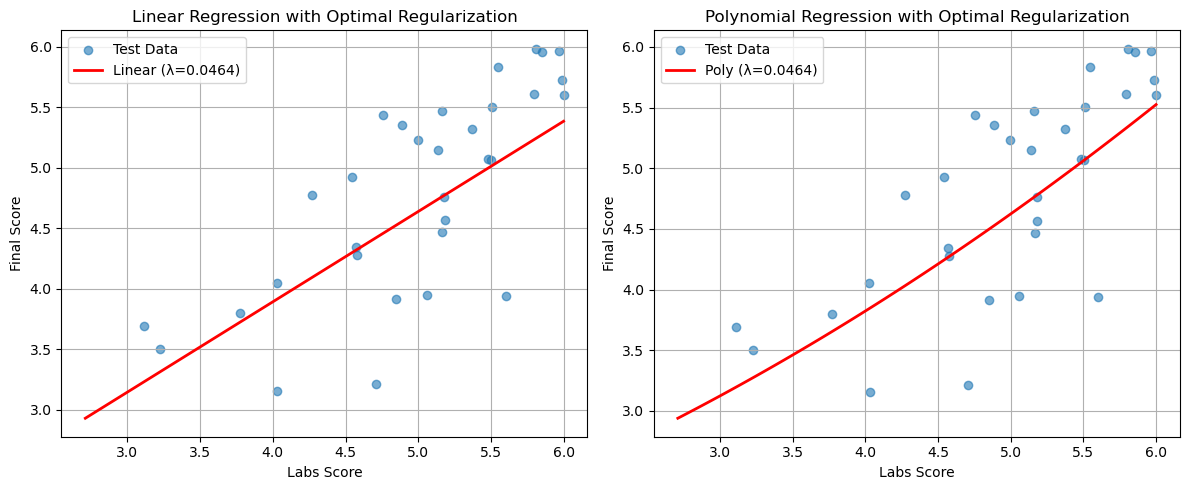

In [9]:
# Train final models with the best Lambdas 
if valid_linear_data and valid_poly_data:
    # Linear model with best Lambda
    best_linear_model = SGDRegressor(
        alpha=best_Lambda_linear,
        learning_rate='constant',
        eta0=learning_rate,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        penalty='l2'
    )
    best_linear_model.fit(X_train_scaled, y_train)
    
    # Polynomial model with best Lambda
    best_poly_model = SGDRegressor(
        alpha=best_Lambda_poly,
        learning_rate='constant',
        eta0=learning_rate,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        penalty='l2'
    )
    best_poly_model.fit(X_train_poly_scaled, y_train)
    
    # Create a range of X values for plotting
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_scaled = scaler.transform(X_range)
    X_range_poly = poly.transform(X_range)
    X_range_poly_scaled = scaler_poly.transform(X_range_poly)
    
    # Predict with the optimal models
    y_range_linear = best_linear_model.predict(X_range_scaled)
    y_range_poly = best_poly_model.predict(X_range_poly_scaled)
    
    # Plot the fitted models
    plt.figure(figsize=(12, 5))
    
    # Linear model
    plt.subplot(1, 2, 1)
    plt.scatter(X_test, y_test, alpha=0.6, label='Test Data')
    plt.plot(X_range, y_range_linear, 'r-', linewidth=2, label=f'Linear (λ={best_Lambda_linear:.4f})')
    plt.title('Linear Regression with Optimal Regularization')
    plt.xlabel('Labs Score')
    plt.ylabel('Final Score')
    plt.legend()
    plt.grid(True)
    
    # Polynomial model
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, alpha=0.6, label='Test Data')
    plt.plot(X_range, y_range_poly, 'r-', linewidth=2, label=f'Poly (λ={best_Lambda_poly:.4f})')
    plt.title('Polynomial Regression with Optimal Regularization')
    plt.xlabel('Labs Score')
    plt.ylabel('Final Score')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Learning curves

Now we load our data, but we augment it more than before (we create for each "original" data point 100 more points, instead of 10 as before).

We need more data to demonstrate what happens with the prediction accuracy when we train with more data. The plot of the model performance as a function of dataset size is called "Learning curve". We will again use a polynomial model of degree 2.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Create the dataset using the provided code
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise - now 100 variations per original point
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(100):  # Create 100 variations of each record (before we had 10)
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# Extract the features we want to use: Labs vs Final
X = df_aug['Labs'].values.reshape(-1, 1)
y = df_aug['Final'].values

In [26]:
# Split the data into training and testing sets (use always the same test set).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Function to compute learning curves with absolute training sizes
def plot_learning_curve(model_name, X_train, y_train, X_test, y_test):
    # Define absolute training set sizes to evaluate (10 points from 10% to 100% of training data)
    max_samples = len(X_train)
    train_sizes = np.linspace(int(max_samples * 0.1), max_samples, 10, dtype=int)
    
    # Storage for training and test errors
    train_errors = []
    test_errors = []
    
    # Set model parameters based on previous findings
    if model_name == 'linear':
        model = SGDRegressor(
            alpha=0.01,            # Regularization parameter
            learning_rate='constant',
            eta0=0.01,             # Learning rate
            max_iter=1000,
            random_state=42
        )
        X_train_data = X_train_scaled
        X_test_data = X_test_scaled
    else:  # polynomial
        model = SGDRegressor(
            alpha=0.01,            # Regularization parameter
            learning_rate='constant',
            eta0=0.01,             # Learning rate
            max_iter=1000,
            random_state=42
        )
        X_train_data = X_train_poly_scaled
        X_test_data = X_test_poly_scaled
    
    # For each absolute training set size
    for n_samples in train_sizes:
        # Train the model on a subset of the training data
        model.fit(X_train_data[:n_samples], y_train[:n_samples])
        
        # Calculate training error
        y_train_pred = model.predict(X_train_data[:n_samples])
        train_error = mean_squared_error(y_train[:n_samples], y_train_pred)
        train_errors.append(train_error)
        
        # Calculate test error (always on the full test set)
        y_test_pred = model.predict(X_test_data)
        test_error = mean_squared_error(y_test, y_test_pred)
        test_errors.append(test_error)
    
    return train_sizes, train_errors, test_errors

We will now check how adding more data affects the model performance, always using the same test set.

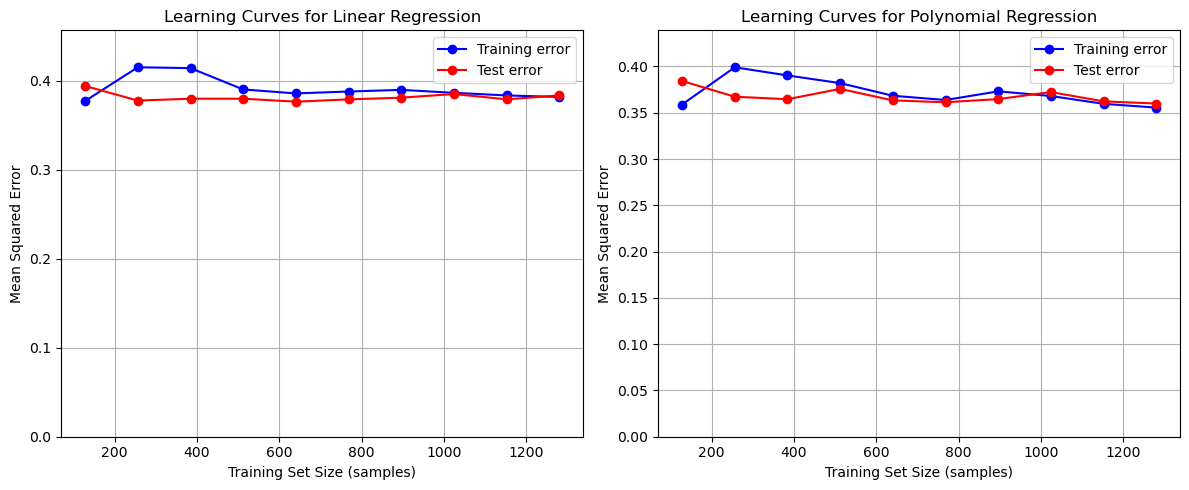


Learning Curve Data
--------------------------------------------------------------------------------
Training Set  |  Linear Model                |  Polynomial Model
Size          |  Train Error    Test Error   |  Train Error    Test Error
--------------------------------------------------------------------------------
 128         |  0.3772        0.3940    |  0.3589        0.3844
 256         |  0.4150        0.3776    |  0.3992        0.3673
 384         |  0.4141        0.3797    |  0.3903        0.3647
 512         |  0.3901        0.3797    |  0.3820        0.3758
 640         |  0.3857        0.3764    |  0.3684        0.3634
 768         |  0.3878        0.3789    |  0.3638        0.3614
 896         |  0.3896        0.3809    |  0.3732        0.3648
1024         |  0.3863        0.3849    |  0.3681        0.3723
1152         |  0.3834        0.3790    |  0.3597        0.3623
1280         |  0.3817        0.3834    |  0.3556        0.3600

Learning Curve Analysis:
------------

In [27]:
# Generate learning curves for both models
linear_sizes, linear_train_errors, linear_test_errors = plot_learning_curve(
    'linear', X_train, y_train, X_test, y_test
)

poly_sizes, poly_train_errors, poly_test_errors = plot_learning_curve(
    'polynomial', X_train, y_train, X_test, y_test
)

# Plot learning curves with absolute training set size
plt.figure(figsize=(12, 5))

# Linear model learning curve
plt.subplot(1, 2, 1)
plt.plot(linear_sizes, linear_train_errors, 'o-', color='blue', label='Training error')
plt.plot(linear_sizes, linear_test_errors, 'o-', color='red', label='Test error')
plt.title('Learning Curves for Linear Regression')
plt.xlabel('Training Set Size (samples)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.ylim(0, max(max(linear_train_errors), max(linear_test_errors))*1.1)

# Polynomial model learning curve
plt.subplot(1, 2, 2)
plt.plot(poly_sizes, poly_train_errors, 'o-', color='blue', label='Training error')
plt.plot(poly_sizes, poly_test_errors, 'o-', color='red', label='Test error')
plt.title('Learning Curves for Polynomial Regression')
plt.xlabel('Training Set Size (samples)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.ylim(0, max(max(poly_train_errors), max(poly_test_errors))*1.1)

plt.tight_layout()
plt.show()

# Print the learning curve data in tabular format
print("\nLearning Curve Data")
print("-" * 80)
print("Training Set  |  Linear Model                |  Polynomial Model")
print("Size          |  Train Error    Test Error   |  Train Error    Test Error")
print("-" * 80)

for i, size in enumerate(linear_sizes):
    print(f"{size:4d}         |  {linear_train_errors[i]:.4f}        {linear_test_errors[i]:.4f}    |  {poly_train_errors[i]:.4f}        {poly_test_errors[i]:.4f}")

# Analyze the learning curves
print("\nLearning Curve Analysis:")
print("-" * 30)

# For Linear Model
final_gap_linear = abs(linear_train_errors[-1] - linear_test_errors[-1])
train_improvement_linear = linear_train_errors[0] - linear_train_errors[-1]
test_improvement_linear = linear_test_errors[0] - linear_test_errors[-1]

print(f"Linear Model:")
print(f"  Final train-test gap: {final_gap_linear:.4f}")
print(f"  Training error improved by: {train_improvement_linear:.4f}")
print(f"  Test error improved by: {test_improvement_linear:.4f}")

# For Polynomial Model
final_gap_poly = abs(poly_train_errors[-1] - poly_test_errors[-1])
train_improvement_poly = poly_train_errors[0] - poly_train_errors[-1]
test_improvement_poly = poly_test_errors[0] - poly_test_errors[-1]

print(f"\nPolynomial Model:")
print(f"  Final train-test gap: {final_gap_poly:.4f}")
print(f"  Training error improved by: {train_improvement_poly:.4f}")
print(f"  Test error improved by: {test_improvement_poly:.4f}")

# Print information about dataset sizes
print(f"\nTotal dataset size after augmentation: {len(df_aug)} samples")
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Now we will test the performance of different *algorithms*, the same way as we tune hyperparameters. We will run the algorithms (assuming the hyperparameters for each of them are already tuned) and will pick the one with the best performance. We will compare linear regression, polynomial regression of high degree, and neural network. 

Also, the data are split in training, test, and validaiton. The validation dataset is used to finally evaluate the performance of the three algorithms. Most of the code below can be skipped, the important part is understanding the plot.

Evaluating Linear Regression...
  Train MSE: 0.3408, Val MSE: 0.3648, Test MSE: 0.3454
  Train R²: 0.5938, Val R²: 0.5420, Test R²: 0.5053
Evaluating Polynomial (degree 9)...
  Train MSE: 0.2971, Val MSE: 0.3545, Test MSE: 0.3260
  Train R²: 0.6459, Val R²: 0.5546, Test R²: 0.5330
Evaluating Neural Network...
  Train MSE: 0.3533, Val MSE: 0.3628, Test MSE: 0.3777
  Train R²: 0.5789, Val R²: 0.5443, Test R²: 0.4590


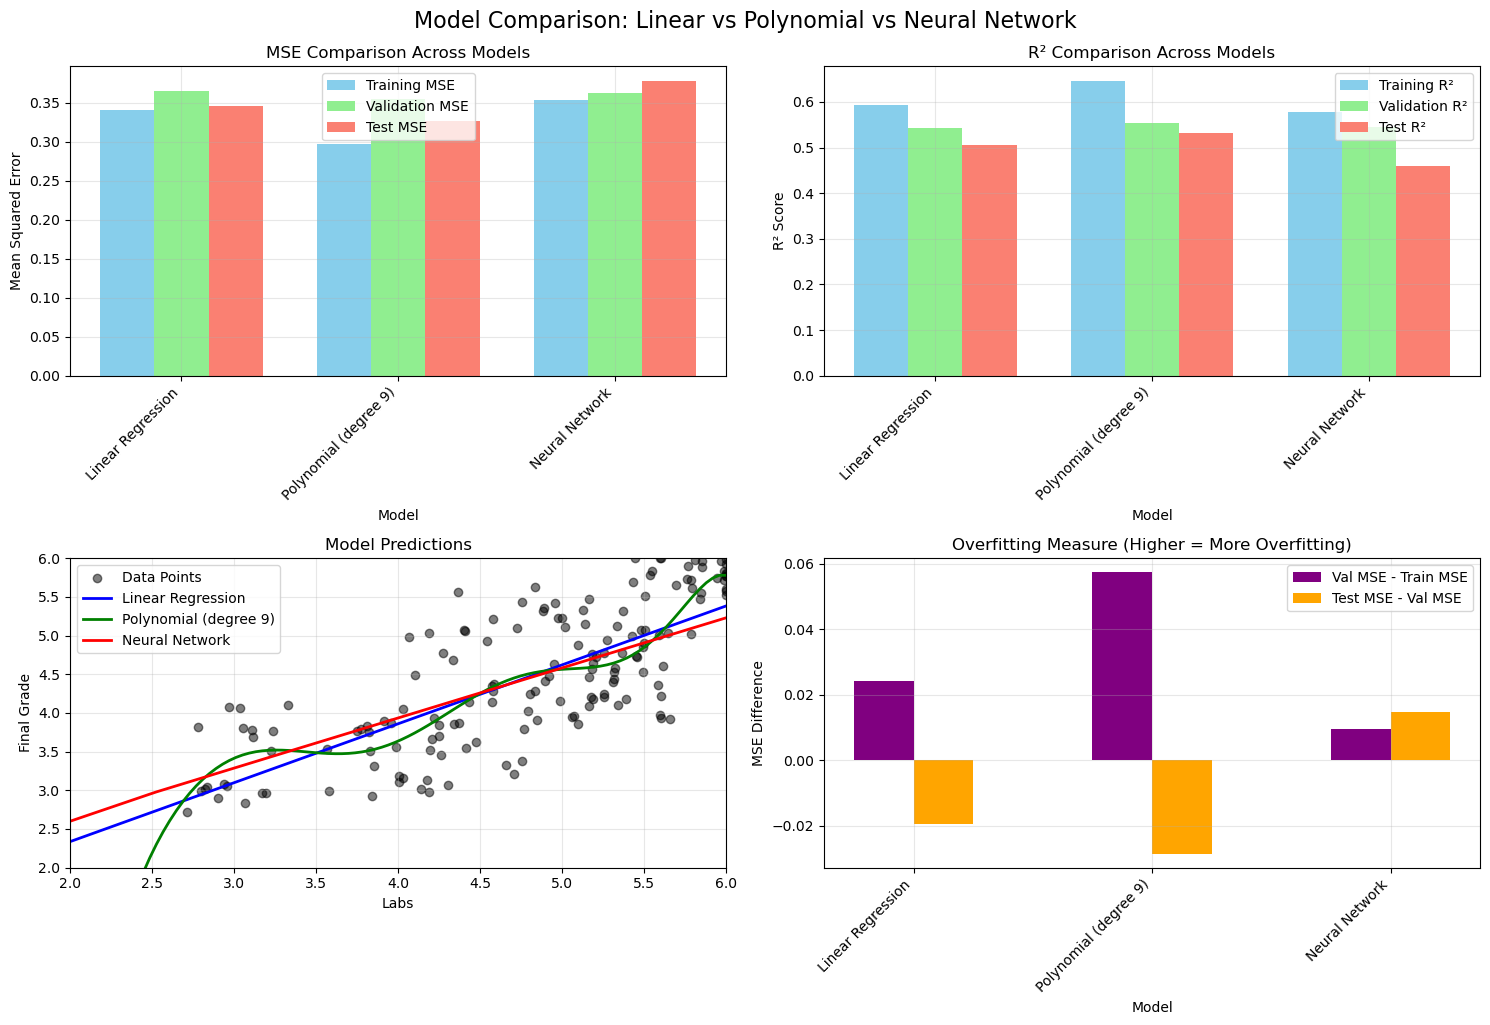


Model Performance Summary:
Model               Train MSE   Val MSE     Test MSE    Train R²    Val R²      Test R²     
--------------------------------------------------------------------------------
Linear Regression   0.3408      0.3648      0.3454      0.5938      0.5420      0.5053      
Polynomial (degree 9)0.2971      0.3545      0.3260      0.6459      0.5546      0.5330      
Neural Network      0.3533      0.3628      0.3777      0.5789      0.5443      0.4590      


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the data from the provided code
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

def compare_models(df_aug, n_splits=5, test_size=0.2, random_state=42):
    """
    Compare different regression models:
    1. Linear Regression
    2. 9th Degree Polynomial Regression
    3. Simple Neural Network
    
    Parameters:
    - df_aug: Augmented DataFrame
    - n_splits: Number of cross-validation splits
    - test_size: Proportion of data for final testing
    - random_state: Random seed for reproducibility
    
    Returns:
    - Performance metrics for each model
    """
    # Use Labs as the feature and Final as the target
    X = df_aug[['Labs']]
    y = df_aug['Final']
    
    # Split data into train+val and test sets (note that this is a two-stage splitting, later (few lines below) we have the second stage.
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Define models
    models = {
        'Linear Regression': make_pipeline(LinearRegression()),
        'Polynomial (degree 9)': make_pipeline(PolynomialFeatures(degree=9), LinearRegression()),
        'Neural Network': MLPRegressor(
            hidden_layer_sizes=(10, 5),  # Simple architecture with 2 hidden layers
            max_iter=1000,
            activation='relu',
            solver='adam',
            alpha=0.0001,  # Regularization parameter
            random_state=random_state
        )
    }
    
    # Prepare cross-validation (for now ignore this, later in the notebook cross-validation is illustrated).
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Results storage
    results = {
        'model_names': [],
        'train_mse': [],
        'val_mse': [],
        'test_mse': [],
        'train_r2': [],
        'val_r2': [],
        'test_r2': []
    }
    
    # For visualization
    x_grid = np.linspace(2, 6, 100).reshape(-1, 1)
    prediction_curves = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"Evaluating {name}...")
        
        # Cross-validation
        cv_train_mse = []
        cv_val_mse = []
        cv_train_r2 = []
        cv_val_r2 = []
        
        for train_idx, val_idx in kf.split(X_trainval):
            # Split data
            X_train, X_val = X_trainval.iloc[train_idx], X_trainval.iloc[val_idx]
            y_train, y_val = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]
            
            # Train model
            model.fit(X_train, y_train)
            
            # Predictions
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            
            # Metrics
            train_mse = mean_squared_error(y_train, y_train_pred)
            val_mse = mean_squared_error(y_val, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_val, y_val_pred)
            
            # Store CV results
            cv_train_mse.append(train_mse)
            cv_val_mse.append(val_mse)
            cv_train_r2.append(train_r2)
            cv_val_r2.append(val_r2)
        
        # Retrain on full training+validation set
        model.fit(X_trainval, y_trainval)
        
        # Test predictions
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Store average results
        results['model_names'].append(name)
        results['train_mse'].append(np.mean(cv_train_mse))
        results['val_mse'].append(np.mean(cv_val_mse))
        results['test_mse'].append(test_mse)
        results['train_r2'].append(np.mean(cv_train_r2))
        results['val_r2'].append(np.mean(cv_val_r2))
        results['test_r2'].append(test_r2)
        
        # Generate prediction curve for visualization
        prediction_curves[name] = model.predict(x_grid)
        
        print(f"  Train MSE: {np.mean(cv_train_mse):.4f}, Val MSE: {np.mean(cv_val_mse):.4f}, Test MSE: {test_mse:.4f}")
        print(f"  Train R²: {np.mean(cv_train_r2):.4f}, Val R²: {np.mean(cv_val_r2):.4f}, Test R²: {test_r2:.4f}")
    
    # Create visualizations
    # 1. MSE Comparison
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    bar_width = 0.25
    index = np.arange(len(results['model_names']))
    
    plt.bar(index - bar_width, results['train_mse'], bar_width, label='Training MSE', color='skyblue')
    plt.bar(index, results['val_mse'], bar_width, label='Validation MSE', color='lightgreen')
    plt.bar(index + bar_width, results['test_mse'], bar_width, label='Test MSE', color='salmon')
    
    plt.xlabel('Model')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE Comparison Across Models')
    plt.xticks(index, results['model_names'], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. R² Comparison
    plt.subplot(2, 2, 2)
    
    plt.bar(index - bar_width, results['train_r2'], bar_width, label='Training R²', color='skyblue')
    plt.bar(index, results['val_r2'], bar_width, label='Validation R²', color='lightgreen')
    plt.bar(index + bar_width, results['test_r2'], bar_width, label='Test R²', color='salmon')
    
    plt.xlabel('Model')
    plt.ylabel('R² Score')
    plt.title('R² Comparison Across Models')
    plt.xticks(index, results['model_names'], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Prediction Curves
    plt.subplot(2, 2, 3)
    
    # Plot the original data
    plt.scatter(X, y, color='black', alpha=0.5, label='Data Points')
    
    # Plot prediction curves
    colors = ['blue', 'green', 'red']
    for i, (name, curve) in enumerate(prediction_curves.items()):
        plt.plot(x_grid, curve, color=colors[i], linewidth=2, label=name)
    
    plt.xlabel('Labs')
    plt.ylabel('Final Grade')
    plt.title('Model Predictions')
    plt.xlim(2, 6)
    plt.ylim(2, 6)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Error Comparison
    plt.subplot(2, 2, 4)
    
    # Calculate differences between metrics
    train_val_diff = [val - train for train, val in zip(results['train_mse'], results['val_mse'])]
    val_test_diff = [test - val for val, test in zip(results['val_mse'], results['test_mse'])]
    
    # Plot the differences as a measure of overfitting
    plt.bar(index - bar_width/2, train_val_diff, bar_width, label='Val MSE - Train MSE', color='purple')
    plt.bar(index + bar_width/2, val_test_diff, bar_width, label='Test MSE - Val MSE', color='orange')
    
    plt.xlabel('Model')
    plt.ylabel('MSE Difference')
    plt.title('Overfitting Measure (Higher = More Overfitting)')
    plt.xticks(index, results['model_names'], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Model Comparison: Linear vs Polynomial vs Neural Network', fontsize=16, y=1.02)
    
    return plt.gcf(), results, prediction_curves

# Run the model comparison
fig, results, prediction_curves = compare_models(df_aug)

# Display and save results
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary table
print("\nModel Performance Summary:")
print("=" * 80)
print(f"{'Model':<20}{'Train MSE':<12}{'Val MSE':<12}{'Test MSE':<12}{'Train R²':<12}{'Val R²':<12}{'Test R²':<12}")
print("-" * 80)
for i, model in enumerate(results['model_names']):
    print(f"{model:<20}{results['train_mse'][i]:<12.4f}{results['val_mse'][i]:<12.4f}{results['test_mse'][i]:<12.4f}"
          f"{results['train_r2'][i]:<12.4f}{results['val_r2'][i]:<12.4f}{results['test_r2'][i]:<12.4f}")

Model coefficients: 2.0011
Model intercept: -9.9306
Decision boundary (p=0.5) at Lab score = 4.9627


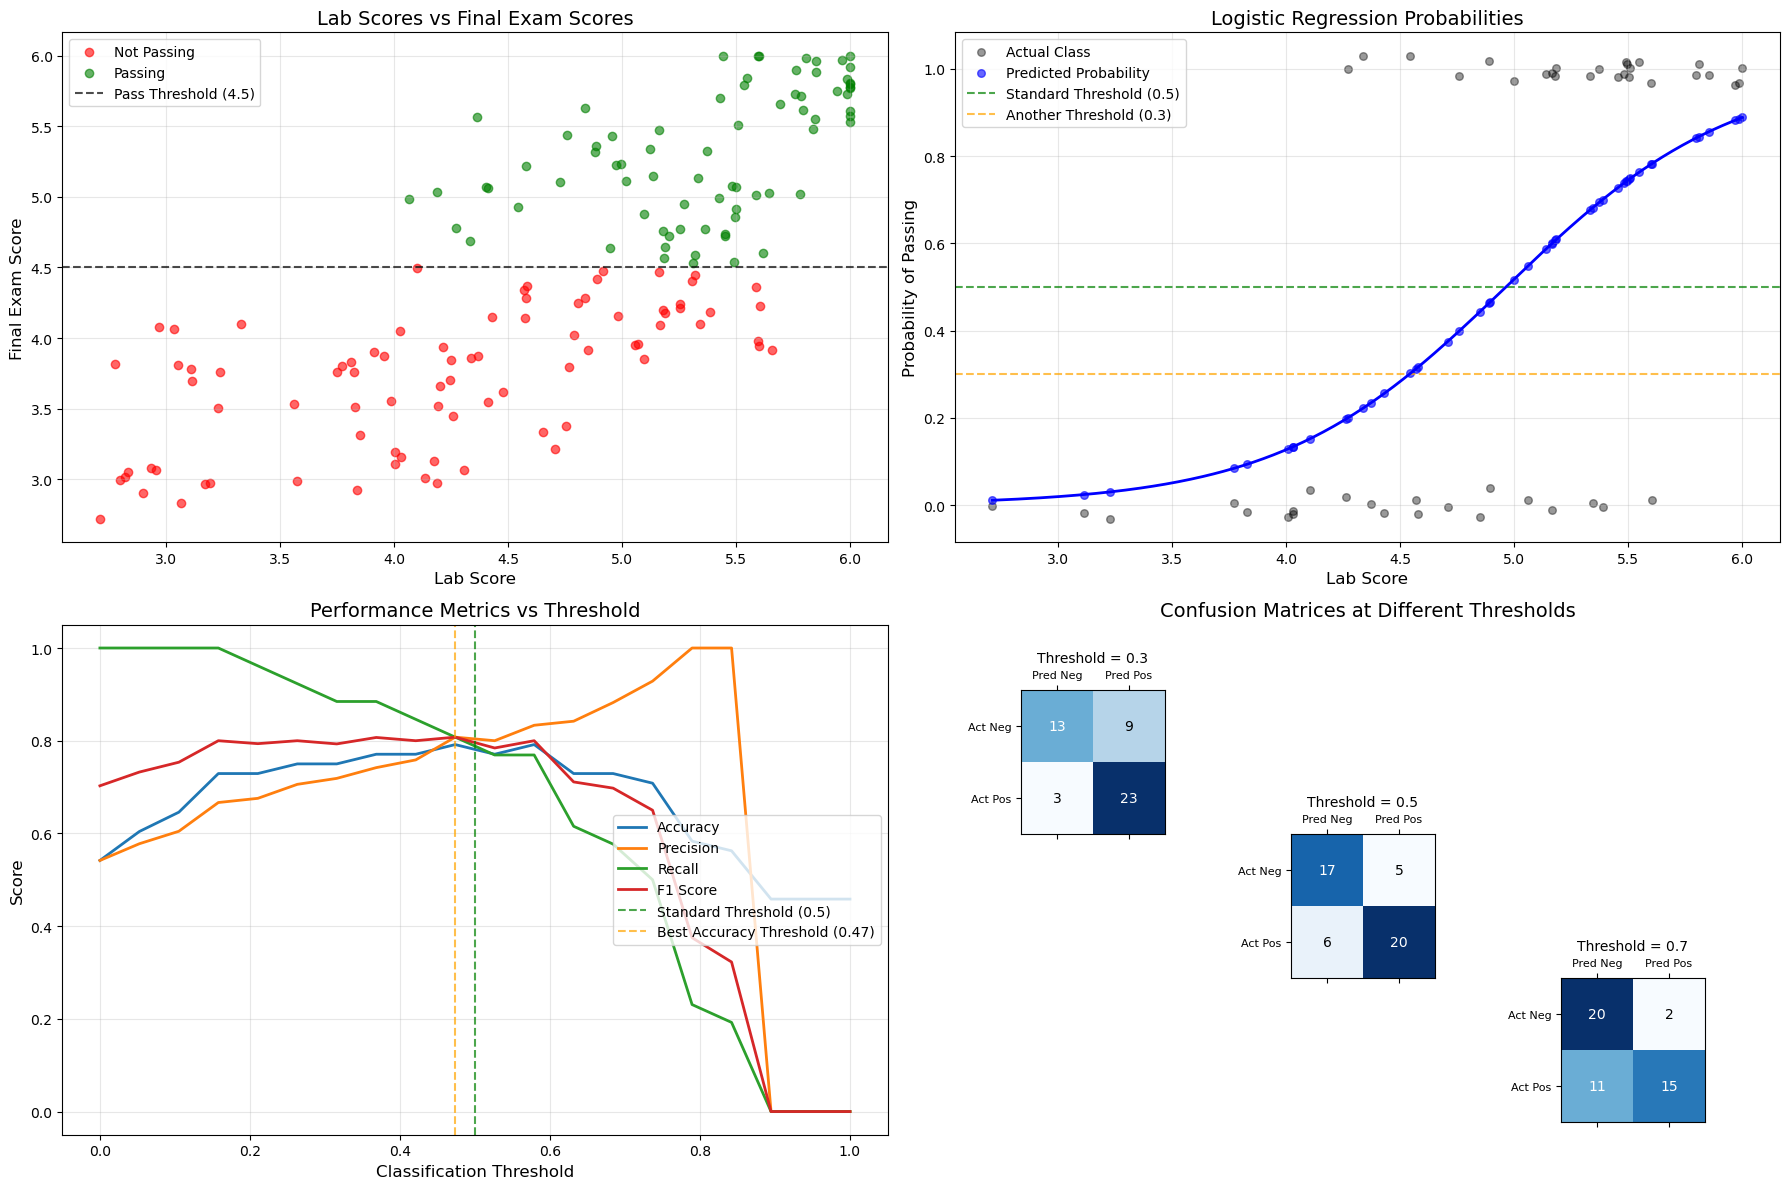

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Initial data
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# For logistic regression, we need a categorical target
# Above 4.5 = "Pass" (1), Below 4.5 = "Needs Improvement" (0)
df_aug['Pass'] = (df_aug['Final'] > 4.5).astype(int)

# Use only 'Labs' to predict 'Pass'
X = df_aug[['Labs']]
y = df_aug['Pass']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a range of thresholds
thresholds = np.linspace(0, 1, 20)  # From 0 to 1 in steps of 0.01

# Calculate metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Find the threshold with the highest accuracy
best_accuracy_idx = np.argmax(accuracy_scores)
best_accuracy_threshold = thresholds[best_accuracy_idx]
best_accuracy = accuracy_scores[best_accuracy_idx]

# Find the threshold with the highest F1 score
best_f1_idx = np.argmax(f1_scores)
best_f1_threshold = thresholds[best_f1_idx]
best_f1 = f1_scores[best_f1_idx]

# Create a figure with subplots
fig = plt.figure(figsize=(18, 12))

# First plot: Labs vs Final with color coding for passing/not passing
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(df_aug[df_aug['Pass'] == 0]['Labs'], 
           df_aug[df_aug['Pass'] == 0]['Final'], 
           color='red', alpha=0.6, label='Not Passing')
ax1.scatter(df_aug[df_aug['Pass'] == 1]['Labs'], 
           df_aug[df_aug['Pass'] == 1]['Final'], 
           color='green', alpha=0.6, label='Passing')
ax1.axhline(y=4.5, color='black', linestyle='--', alpha=0.7, label='Pass Threshold (4.5)')
ax1.set_xlabel('Lab Score', fontsize=12)
ax1.set_ylabel('Final Exam Score', fontsize=12)
ax1.set_title('Lab Scores vs Final Exam Scores', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Second plot: Logistic Regression Probabilities
ax2 = fig.add_subplot(2, 2, 2)

# Sort the test data by Lab scores for smoother plotting
sorted_indices = np.argsort(X_test['Labs'].values)
sorted_labs = X_test['Labs'].values[sorted_indices]
sorted_probs = y_pred_prob[sorted_indices]
sorted_actuals = y_test.values[sorted_indices]

# Plot the actual class with jitter for visibility
jitter = np.random.normal(0, 0.02, len(sorted_actuals))
ax2.scatter(sorted_labs, sorted_actuals + jitter, color='black', alpha=0.4, s=30, label='Actual Class')

# Plot the predicted probabilities
ax2.scatter(sorted_labs, sorted_probs, color='blue', alpha=0.6, s=30, label='Predicted Probability')

# Add example thresholds
ax2.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Standard Threshold (0.5)')
ax2.axhline(y=0.3, color='orange', linestyle='--', alpha=0.7, 
           label=f'Another Threshold (0.3)')

# Create a continuous prediction curve
lab_range = np.linspace(min(sorted_labs), max(sorted_labs), 300).reshape(-1, 1)
prob_range = model.predict_proba(lab_range)[:, 1]
ax2.plot(lab_range, prob_range, color='blue', linewidth=2)

ax2.set_xlabel('Lab Score', fontsize=12)
ax2.set_ylabel('Probability of Passing', fontsize=12)
ax2.set_title('Logistic Regression Probabilities', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Third plot: Accuracy, Precision, Recall vs Threshold
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(thresholds, accuracy_scores, label='Accuracy', linewidth=2)
ax3.plot(thresholds, precision_scores, label='Precision', linewidth=2)
ax3.plot(thresholds, recall_scores, label='Recall', linewidth=2)
ax3.plot(thresholds, f1_scores, label='F1 Score', linewidth=2)
ax3.axvline(x=0.5, color='green', linestyle='--', alpha=0.7, label='Standard Threshold (0.5)')
ax3.axvline(x=best_accuracy_threshold, color='orange', linestyle='--', alpha=0.7,
           label=f'Best Accuracy Threshold ({best_accuracy_threshold:.2f})')

ax3.set_xlabel('Classification Threshold', fontsize=12)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Performance Metrics vs Threshold', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='center right')

# Fourth plot: Confusion matrices at different thresholds
ax4 = fig.add_subplot(2, 2, 4)

# Choose several thresholds to show confusion matrices
example_thresholds = [0.3, 0.5, 0.7]
colors = ['lightblue', 'lightgreen', 'lightsalmon']

for i, threshold in enumerate(example_thresholds):
    idx = np.abs(thresholds - threshold).argmin()  # Find the closest threshold
    cm = confusion_matrices[idx]
    
    # Create a mini confusion matrix
    mini_ax = plt.axes([0.55 + i*0.15, 0.3 - i*0.12, 0.12, 0.12])
    mini_ax.matshow(cm, cmap='Blues')
    mini_ax.set_title(f'Threshold = {threshold:.1f}', fontsize=10)
    mini_ax.set_xticks([0, 1])
    mini_ax.set_yticks([0, 1])
    mini_ax.set_xticklabels(['Pred Neg', 'Pred Pos'], fontsize=8)
    mini_ax.set_yticklabels(['Act Neg', 'Act Pos'], fontsize=8)
    
    # Add the confusion matrix values
    for i in range(2):
        for j in range(2):
            mini_ax.text(j, i, str(cm[i, j]), 
                       ha="center", va="center", fontsize=10,
                       color="white" if cm[i, j] > cm.max()/2 else "black")



ax4.axis('off')
ax4.set_title('Confusion Matrices at Different Thresholds', fontsize=14)

plt.tight_layout()
plt.savefig('threshold_effects_on_accuracy.png', dpi=300)

# Print summary information
print(f"Model coefficients: {model.coef_[0][0]:.4f}")
print(f"Model intercept: {model.intercept_[0]:.4f}")
print(f"Decision boundary (p=0.5) at Lab score = {(-model.intercept_[0]/model.coef_[0][0]):.4f}")



# Accuracy, precision, recall, F-score #


We will now move to performance metrics for classification. We will use the logistic regression model as a classification algorithm.

We will illustrate the concept of applying threshold to the probility outputs.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Initial data
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# For logistic regression, we need a categorical target
# Above 4.5 = "Pass" (1), Below 4.5 = "Needs Improvement" (0)
df_aug['Pass'] = (df_aug['Final'] > 4.5).astype(int)

# Use only 'Labs' to predict 'Pass'
X = df_aug[['Labs']]
y = df_aug['Pass']

Performance metrics at different thresholds:

Threshold | Accuracy | Precision | Recall | F1 Score | TN | FP | FN | TP
---------------------------------------------------------------------------
     0.25 |    0.729 |     0.686 |  0.923 |    0.787 | 11 | 11 |  2 | 24
     0.30 |    0.750 |     0.706 |  0.923 |    0.800 | 12 | 10 |  2 | 24
     0.50 |    0.792 |     0.808 |  0.808 |    0.808 | 17 |  5 |  5 | 21
     0.75 |    0.604 |     0.889 |  0.308 |    0.457 | 21 |  1 | 18 |  8
     0.95 |    0.458 |     0.000 |  0.000 |    0.000 | 22 |  0 | 26 |  0

Logistic Regression Model:
P(Pass) = 1 / (1 + exp(-(-9.931 + 2.001 * Lab)))
Decision boundary (p=0.5) at Lab score = 4.963

Class distribution in test set:
Pass rate: 54.2%
Fail rate: 45.8%


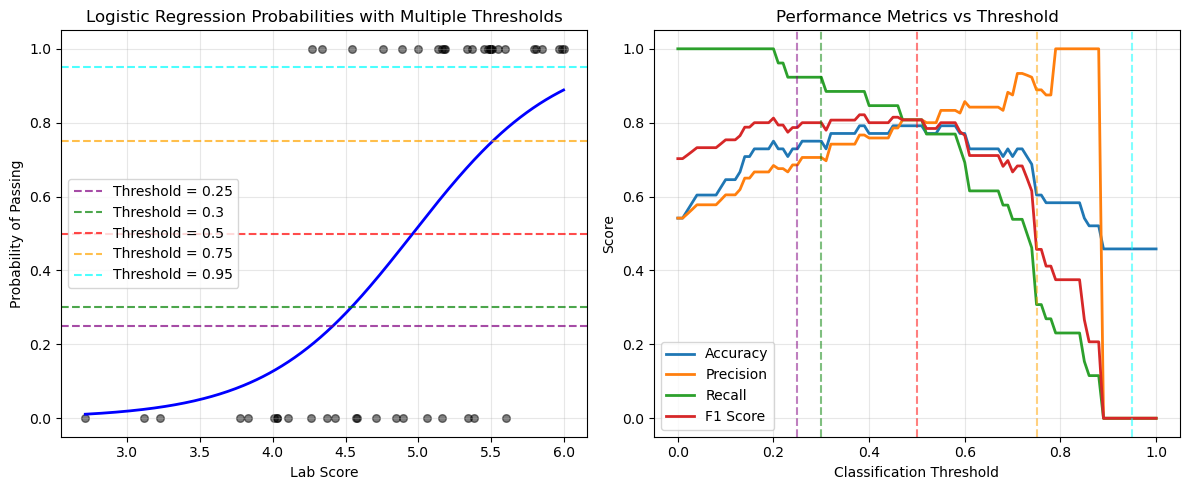

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a range of thresholds to evaluate
thresholds = np.linspace(0, 1, 101)  # From 0 to 1 in steps of 0.01

# Calculate metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Specific thresholds requested
specific_thresholds = [0.25, 0.3, 0.5, 0.75, 0.95]
specific_indices = [np.abs(thresholds - t).argmin() for t in specific_thresholds]

# Create the visualization with only two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Sort the test data by Lab scores for plotting
sorted_indices = np.argsort(X_test['Labs'].values)
sorted_labs = X_test['Labs'].values[sorted_indices]
sorted_probs = y_pred_prob[sorted_indices]
sorted_actuals = y_test.values[sorted_indices]

# Create a continuous prediction curve
lab_range = np.linspace(min(X['Labs']), max(X['Labs']), 300).reshape(-1, 1)
lab_range_df = pd.DataFrame(lab_range, columns=['Labs'])
prob_range = model.predict_proba(lab_range_df)[:, 1]

# Plot 1: Lab scores vs Probability with multiple thresholds
axs[0].scatter(X_test['Labs'], y_test, c='black', alpha=0.5, s=30)
axs[0].plot(lab_range, prob_range, color='blue', linewidth=2)

# Add the specific thresholds
colors = ['purple', 'green', 'red', 'orange', 'cyan']
for i, threshold in enumerate(specific_thresholds):
    axs[0].axhline(y=threshold, color=colors[i], linestyle='--', alpha=0.7, 
                   label=f'Threshold = {threshold}')

axs[0].set_xlabel('Lab Score')
axs[0].set_ylabel('Probability of Passing')
axs[0].set_title('Logistic Regression Probabilities with Multiple Thresholds')
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# Plot 2: Metrics vs Threshold with specific thresholds marked
axs[1].plot(thresholds, accuracy_scores, label='Accuracy', linewidth=2)
axs[1].plot(thresholds, precision_scores, label='Precision', linewidth=2)
axs[1].plot(thresholds, recall_scores, label='Recall', linewidth=2)
axs[1].plot(thresholds, f1_scores, label='F1 Score', linewidth=2)

# Mark specific thresholds on the metrics plot
for i, (threshold, idx) in enumerate(zip(specific_thresholds, specific_indices)):
    axs[1].axvline(x=threshold, color=colors[i], linestyle='--', alpha=0.5)

axs[1].set_xlabel('Classification Threshold')
axs[1].set_ylabel('Score')
axs[1].set_title('Performance Metrics vs Threshold')
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.savefig('two_subplots_threshold_analysis.png', dpi=300)

# Print metrics for each threshold
print("Performance metrics at different thresholds:\n")
print("Threshold | Accuracy | Precision | Recall | F1 Score | TN | FP | FN | TP")
print("-" * 75)

for threshold, idx in zip(specific_thresholds, specific_indices):
    cm = confusion_matrices[idx]
    tn, fp, fn, tp = cm.ravel()
    
    print(f"{threshold:9.2f} | {accuracy_scores[idx]:8.3f} | {precision_scores[idx]:9.3f} | {recall_scores[idx]:6.3f} | {f1_scores[idx]:8.3f} | {tn:2d} | {fp:2d} | {fn:2d} | {tp:2d}")

# Print the decision boundary (Lab score where p=0.5)
decision_boundary = -model.intercept_[0]/model.coef_[0][0]
print(f"\nLogistic Regression Model:")
print(f"P(Pass) = 1 / (1 + exp(-({model.intercept_[0]:.3f} + {model.coef_[0][0]:.3f} * Lab)))")
print(f"Decision boundary (p=0.5) at Lab score = {decision_boundary:.3f}")

# Calculate class distribution
pass_rate = y_test.mean() * 100
print(f"\nClass distribution in test set:")
print(f"Pass rate: {pass_rate:.1f}%")
print(f"Fail rate: {100-pass_rate:.1f}%")

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a range of thresholds to evaluate
thresholds = np.linspace(0, 1, 101)  # From 0 to 1 in steps of 0.01

# Calculate metrics for each threshold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Specific thresholds requested
specific_thresholds = [0.25, 0.3, 0.5, 0.75, 0.95]
specific_indices = [np.abs(thresholds - t).argmin() for t in specific_thresholds]

# Create the visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Sort the test data by Lab scores for plotting
sorted_indices = np.argsort(X_test['Labs'].values)
sorted_labs = X_test['Labs'].values[sorted_indices]
sorted_probs = y_pred_prob[sorted_indices]
sorted_actuals = y_test.values[sorted_indices]

# Create a continuous prediction curve
lab_range = np.linspace(min(X['Labs']), max(X['Labs']), 300).reshape(-1, 1)
prob_range = model.predict_proba(lab_range)[:, 1]

# Plot 1: Lab scores vs Probability with multiple thresholds
axs[0, 0].scatter(X_test['Labs'], y_test, c='black', alpha=0.5, s=30)
axs[0, 0].plot(lab_range, prob_range, color='blue', linewidth=2)

# Add the specific thresholds
#colors = ['purple', 'green', 'red', 'orange', 'cyan']
#for i, threshold in enumerate(specific_thresholds):
#    axs[0, 0].axhline(y=threshold, color=colors[i], linestyle='--', alpha=0.7, 
#                     label=f'Threshold = {threshold}')

axs[0, 0].set_xlabel('Lab Score')
axs[0, 0].set_ylabel('Probability of Passing')
axs[0, 0].set_title('Logistic Regression Probabilities with Multiple Thresholds')
axs[0, 0].grid(True, alpha=0.3)


# Plot 2: Metrics vs Threshold with specific thresholds marked
axs[0, 1].plot(thresholds, accuracy_scores, label='Accuracy', linewidth=2)
axs[0, 1].plot(thresholds, precision_scores, label='Precision', linewidth=2)
axs[0, 1].plot(thresholds, recall_scores, label='Recall', linewidth=2)


axs[0, 1].set_xlabel('Classification Threshold')
axs[0, 1].set_ylabel('Score')
axs[0, 1].set_title('Performance Metrics vs Threshold')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].legend()
plt.tight_layout()
# Plot confusion matrices for each threshold
#for i, (threshold, idx) in enumerate(zip(specific_thresholds, specific_indices)):
#    row = i // 3
#    col = i % 3
#    if row == 1 and col == 2:  # Skip the last cell (empty)
#        break
        
    # Get predictions and metrics for this threshold
y_pred = (y_pred_prob >= threshold).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
    

# Make the empty plot invisible
#axs[1, 2].axis('off')


#plt.savefig('multiple_thresholds.png', dpi=300)

# Print metrics for each threshold
print("Performance metrics at different thresholds:\n")
print("Threshold | Accuracy | Precision | Recall | F1 Score | TN | FP | FN | TP")
print("-" * 75)

for threshold, idx in zip(specific_thresholds, specific_indices):
    cm = confusion_matrices[idx]
    tn, fp, fn, tp = cm.ravel()
    
    print(f"{threshold:9.2f} | {accuracy_scores[idx]:8.3f} | {precision_scores[idx]:9.3f} | {recall_scores[idx]:6.3f} | {f1_scores[idx]:8.3f} | {tn:2d} | {fp:2d} | {fn:2d} | {tp:2d}")

# Print the decision boundary (Lab score where p=0.5)
decision_boundary = -model.intercept_[0]/model.coef_[0][0]
print(f"\nLogistic Regression Model:")
print(f"P(Pass) = 1 / (1 + exp(-({model.intercept_[0]:.3f} + {model.coef_[0][0]:.3f} * Lab)))")
print(f"Decision boundary (p=0.5) at Lab score = {decision_boundary:.3f}")

# Calculate class distribution
pass_rate = y_test.mean() * 100
print(f"\nClass distribution in test set:")
print(f"Pass rate: {pass_rate:.1f}%")
print(f"Fail rate: {100-pass_rate:.1f}%")

We now plot the precision-recall curve 

NameError: name 'LinearSegmentedColormap' is not defined

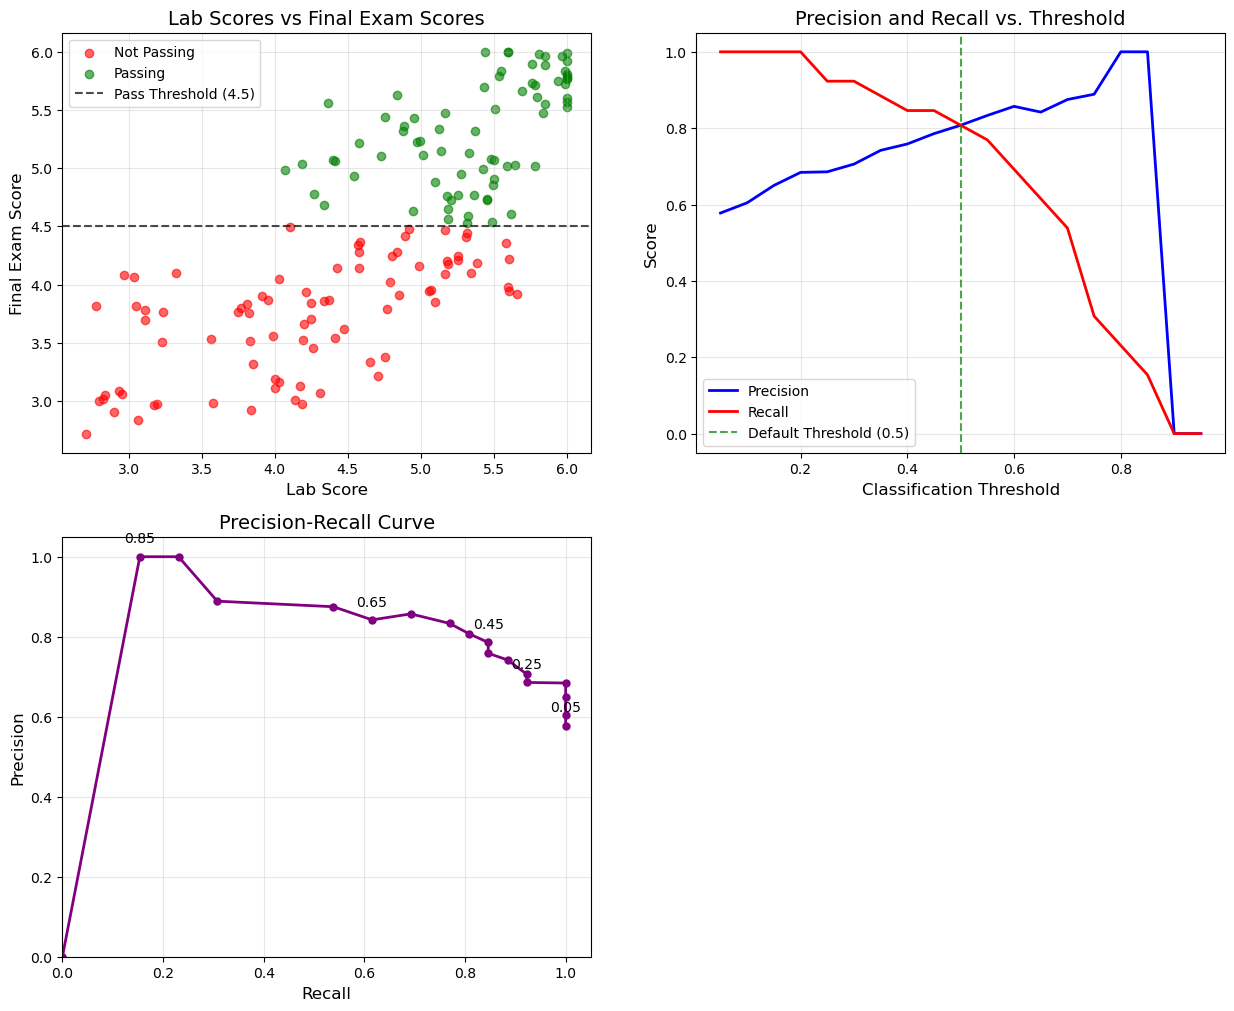

In [33]:
# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a range of thresholds to evaluate
thresholds = np.linspace( 0.05, 0.95, 19)  # From 0.05 to 0.95 in steps of 0.05

# Calculate precision and recall for each threshold
precision_scores = []
recall_scores = []
confusion_matrices = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

# Create a figure with multiple plots
plt.figure(figsize=(15, 12))

# Plot 1: Scatter plot of Labs vs Final with color coding
ax1 = plt.subplot(2, 2, 1)
ax1.scatter(df_aug[df_aug['Pass'] == 0]['Labs'], df_aug[df_aug['Pass'] == 0]['Final'], 
            color='red', alpha=0.6, label='Not Passing')
ax1.scatter(df_aug[df_aug['Pass'] == 1]['Labs'], df_aug[df_aug['Pass'] == 1]['Final'], 
            color='green', alpha=0.6, label='Passing')
ax1.axhline(y=4.5, color='black', linestyle='--', alpha=0.7, label='Pass Threshold (4.5)')
ax1.set_xlabel('Lab Score', fontsize=12)
ax1.set_ylabel('Final Exam Score', fontsize=12)
ax1.set_title('Lab Scores vs Final Exam Scores', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Precision and Recall vs Threshold
ax2 = plt.subplot(2, 2, 2)
ax2.plot(thresholds, precision_scores, 'b-', linewidth=2, label='Precision')
ax2.plot(thresholds, recall_scores, 'r-', linewidth=2, label='Recall')
ax2.axvline(x=0.5, color='green', linestyle='--', alpha=0.7, label='Default Threshold (0.5)')
ax2.set_xlabel('Classification Threshold', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Precision and Recall vs. Threshold', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Precision-Recall Curve
ax3 = plt.subplot(2, 2, 3)
ax3.plot(recall_scores, precision_scores, 'purple', marker='o', markersize=5, linewidth=2)

# Add threshold annotations to a few points
for i, threshold in enumerate(thresholds):
    if i % 4 == 0:  # Only annotate every 4th point to avoid clutter
        ax3.annotate(f'{threshold:.2f}', 
                    (recall_scores[i], precision_scores[i]),
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')

ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Precision', fontsize=12)
ax3.set_title('Precision-Recall Curve', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 1.05)
ax3.set_ylim(0, 1.05)

# Plot 4: Confusion Matrices at different thresholds
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Define a custom colormap (blue gradient)
cmap = LinearSegmentedColormap.from_list('blue_gradient', ['white', '#4a7ebb'])

# Choose specific thresholds to show confusion matrices
example_thresholds = [0.25, 0.5, 0.75]
positions = [(0.1, 0.65), (0.4, 0.65), (0.7, 0.65)]  # Positions for the confusion matrices



plt.tight_layout()
plt.savefig('precision_recall_explanation.png', dpi=300)

# Calculate and print some example values for specific thresholds
print("Precision and Recall at different thresholds:")
print("Threshold | Precision | Recall  | TP | FP | TN | FN")
print("-" * 50)

for threshold in [0.25, 0.5, 0.75]:
    idx = np.abs(thresholds - threshold).argmin()
    tn, fp, fn, tp = cm.ravel()
    precision = precision_scores[idx]
    recall = recall_scores[idx]
    print(f"{threshold:9.2f} | {precision:9.3f} | {recall:7.3f} | {tp:2d} | {fp:2d} | {tn:2d} | {fn:2d}")

We will now switch the dataset to illustrate the precision-recall curve with a better-behaved dataset. The learning task is to classify bening vs malignat tumor, given the tumor size.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Precision range: 0.6316 to 1.0000
Recall range: 0.0000 to 1.0000
Set axis limits - X: 0.00 to 1.05, Y: 0.58 to 1.05
Optimal point - Precision: 0.9907, Recall: 0.9907


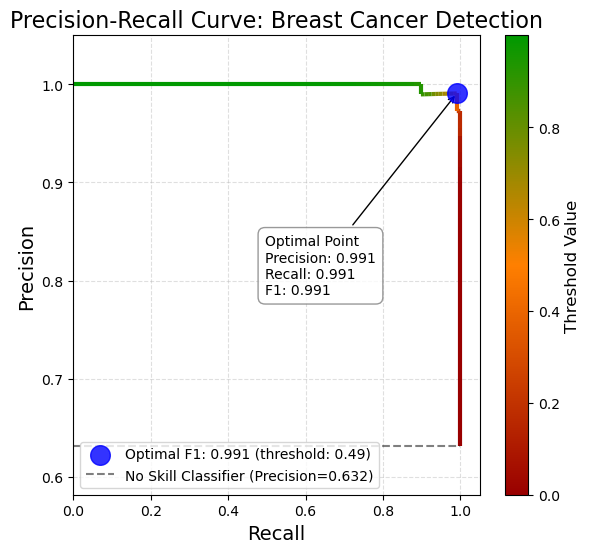

In [35]:
# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1 scores for each threshold
f1_scores = []
for i in range(len(thresholds)):
    f1 = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0
    f1_scores.append(f1)

# Find the threshold with the best F1 score
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
best_precision = precision[best_f1_idx]
best_recall = recall[best_f1_idx]
best_f1 = f1_scores[best_f1_idx]

# average precision score
average_precision = average_precision_score(y_test, y_pred_prob)

min_precision = np.min(precision)
min_recall = np.min(recall)

# axis limits
x_min = max(0, min_recall - 0.05)
y_min = max(0, min_precision - 0.05)


plt.figure(figsize=(6, 6))

# gradient-colored line for the precision-recall curve
points = np.array([recall, precision]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# colormap
colors = [(0.6, 0, 0), (1, 0.5, 0), (0, 0.6, 0)]  # Red -> Orange -> Green
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Normalize the thresholds to use for coloring
norm = plt.Normalize(thresholds.min(), thresholds.max())
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(thresholds)
lc.set_linewidth(3)
line = plt.gca().add_collection(lc)

cbar = plt.colorbar(line, ax=plt.gca())
cbar.set_label('Threshold Value', fontsize=12)

# point with the best F1 score
plt.scatter([best_recall], [best_precision], c='blue', s=200, zorder=10, alpha=0.8,
           label=f'Optimal F1: {best_f1:.3f} (threshold: {best_threshold:.2f})')

# optimal point
plt.annotate(f'Optimal Point\nPrecision: {best_precision:.3f}\nRecall: {best_recall:.3f}\nF1: {best_f1:.3f}',
             xy=(best_recall, best_precision), 
             xytext=(best_recall-(best_recall-x_min)/2, best_precision-(best_precision-y_min)/2),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='black'),
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
             fontsize=10)

# Add a dashed line for the no-skill classifier
plt.plot([0, 1], [y_test.mean(), y_test.mean()], 'k--', alpha=0.5, 
         label=f'No Skill Classifier (Precision={y_test.mean():.3f})')

# Add formatting
plt.title('Precision-Recall Curve: Breast Cancer Detection', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# Set better axis limits
plt.xlim([x_min, 1.05])
plt.ylim([y_min, 1.05])

# Find better positions for explanatory text based on actual data distribution
high_precision_x = x_min + (1 - x_min) * 0.2
high_precision_y = 0.95
high_recall_x = 0.85
high_recall_y = y_min + (1 - y_min) * 0.3


#plt.text(high_precision_x, high_precision_y, 'High Precision Region\nFewer false positives', fontsize=10,
#        bbox=dict(boxstyle="round,pad=0.5", fc="lightblue", ec="blue", alpha=0.6))
#plt.text(high_recall_x, high_recall_y, 'High Recall Region\nFewer false negatives', fontsize=10,
#        bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="orange", alpha=0.6))


#plt.figtext(0.5, 0.01, 
#           f"Breast Cancer Wisconsin Dataset: Binary classification task to detect malignant (positive) vs benign (negative) tumors.\n"
#           f"Average Precision Score: {average_precision:.3f}",
#ç           wrap=True, horizontalalignment='center', fontsize=12)

# Add legend
plt.legend(loc='lower left', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('improved_breast_cancer_pr_curve.png', dpi=300, bbox_inches='tight')

# Print information about the actual data range
print(f"Precision range: {min_precision:.4f} to {np.max(precision):.4f}")
print(f"Recall range: {min_recall:.4f} to {np.max(recall):.4f}")
print(f"Set axis limits - X: {x_min:.2f} to 1.05, Y: {y_min:.2f} to 1.05")
print(f"Optimal point - Precision: {best_precision:.4f}, Recall: {best_recall:.4f}")

# Splitting datasets: fixed split, k-fold cross-validation, leave-ove-out cross-validation #

Logistic Regression Model Evaluation Results
--------------------------------------------------------------------------------
             Method  Accuracy Precision Recall F1 Score Std Dev (Accuracy)  Execution Time (s)
Fixed Split (70/30)    0.7917    0.8077 0.8077   0.8077                N/A              0.0043
       K-Fold (k=5)    0.7812    0.7457 0.8177   0.7780             0.0342              0.0276
      Leave-One-Out    0.7875       N/A    N/A      N/A             0.4091              0.1443

Detailed K-Fold Cross-Validation Results:
------------------------------------------------------------
 Fold  Accuracy  Precision  Recall  F1 Score
    1    0.7812     0.8421  0.8000    0.8205
    2    0.7812     0.6667  0.8333    0.7407
    3    0.8125     0.7500  0.8571    0.8000
    4    0.8125     0.7857  0.7857    0.7857
    5    0.7188     0.6842  0.8125    0.7429
------------------------------------------------------------
Mean Accuracy: 0.7812 (±0.0342)
Mean Precision: 0.7457 (±0.

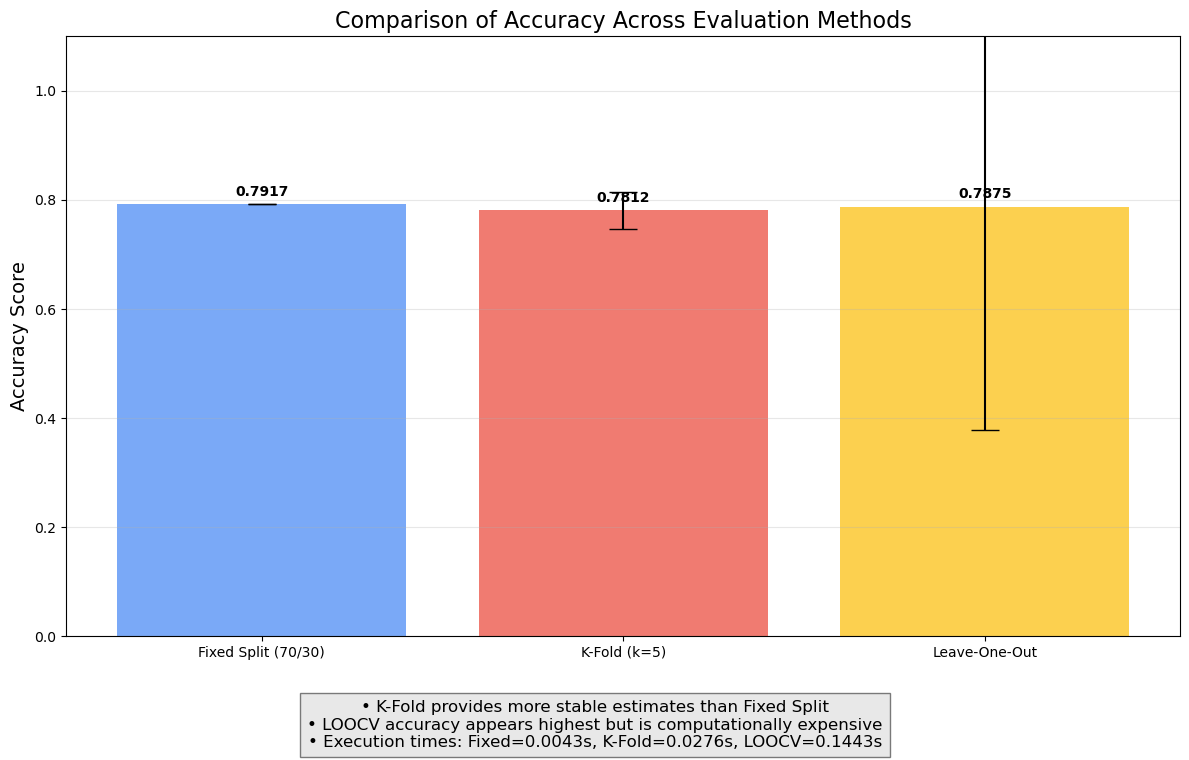

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import time

# Set random seed for reproducibility
np.random.seed(42)

# Initial data
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# For logistic regression, we need a categorical target
# Above 4.5 = "Pass" (1), Below 4.5 = "Needs Improvement" (0)
df_aug['Pass'] = (df_aug['Final'] > 4.5).astype(int)

# Use only 'Labs' to predict 'Pass'
X = df_aug[['Labs']]
y = df_aug['Pass']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
model = LogisticRegression(random_state=42)

# 1. Fixed Split Evaluation
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fixed_accuracy = accuracy_score(y_test, y_pred)
fixed_precision = precision_score(y_test, y_pred)
fixed_recall = recall_score(y_test, y_pred)
fixed_f1 = f1_score(y_test, y_pred)
fixed_time = time.time() - start_time

# 2. K-Fold Cross-Validation (k=5)
start_time = time.time()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')
kfold_time = time.time() - start_time

# 3. Leave-One-Out Cross-Validation
start_time = time.time()
loo = LeaveOneOut()
loo_accuracy = cross_val_score(model, X_scaled, y, cv=loo, scoring='accuracy')
# NOTE: LOOCV for other metrics would be very time-consuming, so we'll estimate
# by using the mean accuracy
loo_time = time.time() - start_time

# Collect results
results = {
    'Method': ['Fixed Split (70/30)', 'K-Fold (k=5)', 'Leave-One-Out'],
    'Accuracy': [
        fixed_accuracy, 
        cv_accuracy.mean(), 
        loo_accuracy.mean()
    ],
    'Precision': [
        fixed_precision, 
        cv_precision.mean(), 
        'N/A'  # Too computationally expensive
    ],
    'Recall': [
        fixed_recall, 
        cv_recall.mean(), 
        'N/A'  # Too computationally expensive
    ],
    'F1 Score': [
        fixed_f1, 
        cv_f1.mean(), 
        'N/A'  # Too computationally expensive
    ],
    'Std Dev (Accuracy)': [
        'N/A',  # Single split has no std dev
        cv_accuracy.std(),
        loo_accuracy.std()
    ],
    'Execution Time (s)': [
        fixed_time,
        kfold_time,
        loo_time
    ]
}

# Convert to DataFrame for pretty display
results_df = pd.DataFrame(results)

# Display results
print("Logistic Regression Model Evaluation Results")
print("-" * 80)
print(results_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else str(x)))

# Create a bar chart to compare accuracy
plt.figure(figsize=(12, 8))

# Plot Accuracy
methods = results['Method']
accuracies = [results['Accuracy'][0], results['Accuracy'][1], results['Accuracy'][2]]
std_devs = [0, results['Std Dev (Accuracy)'][1], results['Std Dev (Accuracy)'][2]]

# Convert 'N/A' to 0 for plotting
std_devs = [0 if x == 'N/A' else x for x in std_devs]

# Bar plot for accuracy
bars = plt.bar(methods, accuracies, alpha=0.7, color=['#4285F4', '#EA4335', '#FBBC05'])
plt.errorbar(methods, accuracies, yerr=std_devs, fmt='none', capsize=10, color='black')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('Comparison of Accuracy Across Evaluation Methods', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)

# Add a text box with key observations
textstr = '\n'.join([
    
    '• K-Fold provides more stable estimates than Fixed Split',
    '• LOOCV accuracy appears highest but is computationally expensive',
    f'• Execution times: Fixed={results["Execution Time (s)"][0]:.4f}s, ' +
    f'K-Fold={results["Execution Time (s)"][1]:.4f}s, ' +
    f'LOOCV={results["Execution Time (s)"][2]:.4f}s'
])

plt.figtext(0.5, 0.01, textstr, ha="center", fontsize=12, 
            bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('cross_validation_comparison.png', dpi=300)

# Display detailed K-fold results
fold_results = pd.DataFrame({
    'Fold': range(1, 6),
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1 Score': cv_f1
})

print("\nDetailed K-Fold Cross-Validation Results:")
print("-" * 60)
print(fold_results.to_string(index=False, float_format=lambda x: f"{x:.4f}"))
print("-" * 60)
print(f"Mean Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"Mean Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
print(f"Mean Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
print(f"Mean F1 Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")